![image](https://docs.google.com/uc?export=download&id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d)

# **Scikit-image Bootcamp**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jpcano1/ISIS_4825_taller_3/blob/master/Scikit_image_Bootcamp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## **Contenido**
1. [**¿Qué es el color y cómo se representa?**](#id1)
2. [**Qué es una imagen y cómo se representa?**](#id2)
    - [**Cargar y visualizar una imagen en Scikit-Image**](#id2-1)
3. [**El histograma de una imagen**](#id3)
    - [**¿Cómo es un histograma de una imagen a color?**](#id3-1)
4. [**Binarización y Umbralización**](#id4)
    - [**Cómo recorrer una imagen**](#id4-1)
    - [**Binarizar a través de  `try_all_threshold` de scikit-image**](#id4-2)
    - [**Segmentación usando el método de la umbralización**](#id4-3)

## **¿Qué es el color y cómo se representa?**<a name="id1"></a>
- El color es una percepción visual que se presenta en el cerebro de los humanos gracias a los fotorreceptores oculares.
- Existen varios modelos para representar las distintos colores, entre ellos los más populares son RGB y CYMK.
- RGB $\to$ Colores en términos de intensidad de Rojo, Verde o Azul
- CYM $\to$ Colores en términos de los pigmentos del Cián, Amarillo y Magenta:

$$\begin{bmatrix} C\\[0.3em] M\\[0.3em] Y
   \end{bmatrix} = \begin{bmatrix} 1\\[0.3em] 1\\[0.3em] 1 
                   \end{bmatrix} - \begin{bmatrix}R\\[0.3em] G\\[0.3em] B\end{bmatrix}$$

## **¿Qué es una imagen y cómo se representa?**<a name="id2"></a>
- Una imagen es una representación visual compuesta por colores.
- Se representa como un conjunto de matrices de tamaño $M \times N$ donde, dependiendo el modelo, una imagen representará un canal de color y cada matriz estará compuesta por números entre 0 y 1 o entre 0 y 255, la mayoría de las veces.
![image](https://www.sketchpad.net/images/channelsrgb.gif)
> Imagen tomada de [Scketch pad](https://www.sketchpad.net/)

### **Cargar y visualizar una imagen en Scikit-Image**<a name="id2-1"></a>

In [1]:
import utils.visualization as vis
from skimage.filters import try_all_threshold, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage import color
%matplotlib inline

In [2]:
# Url de la imagen a descargar
url = "https://www.guiadejardineria.com/wp-content/uploads/2015/04/Psychotria-elata-1.jpg"

In [3]:
# Descargar imagen
vis.download_image(url)

In [4]:
# Cargar imagen a color y transformarla a escala de grises
img = io.imread("image.jpg")
img_gray = color.rgb2gray(img)

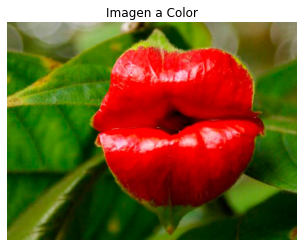

In [5]:
# Visualizar imagen a color
vis.visualize(img, title="Imagen a Color")

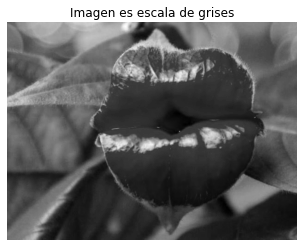

In [6]:
# Visualizar imagen en escala de grises
vis.visualize(img_gray, title="Imagen es escala de grises")

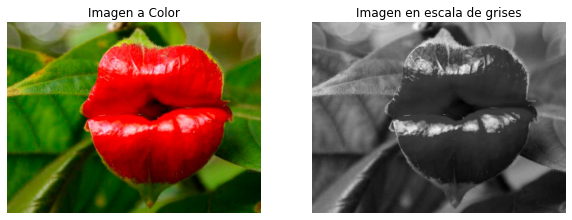

In [7]:
vis.visualize_subplot([img, img_gray], 
                      ["Imagen a Color", "Imagen en escala de grises"], 
                      (1, 2), figsize=(10, 5))

In [8]:
img_red = img[..., 0]
img_green = img[..., 1]
img_blue = img[..., 2]

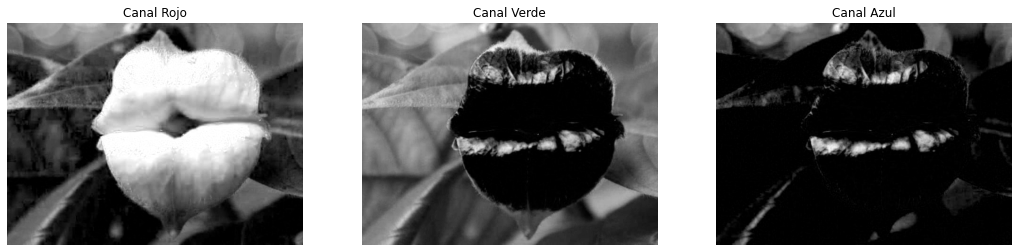

In [9]:
vis.visualize_subplot([
    img_red,
    img_green,
    img_blue
], [
    "Canal Rojo",
    "Canal Verde",
    "Canal Azul"
], (1, 3), figsize=(18, 6))

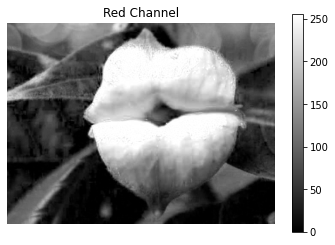

In [10]:
vis.visualize(img_red, title="Red Channel")
plt.colorbar()
plt.show()

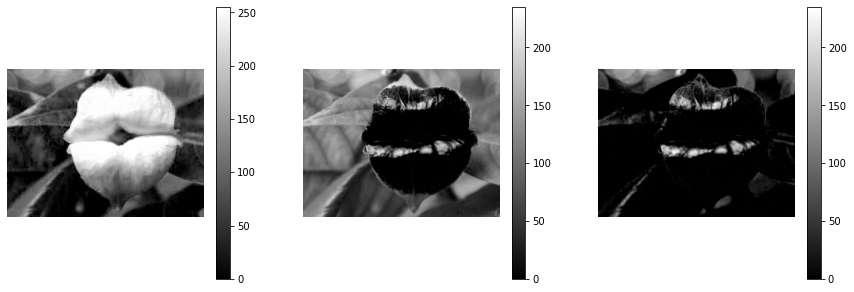

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
vis.imshow(img_red)
plt.colorbar()

plt.subplot(132)
vis.imshow(img_green)
plt.colorbar()

plt.subplot(133)
vis.imshow(img_blue)
plt.colorbar()

plt.show()

## **El histograma de una imagen**<a name="id3"></a>
- Representación gráfica de la distribución de las intensidades de las tonalidades de los canales de la imagen.
### **¿Cómo es un histograma de una imagen a color?**<a name="id3-1"></a>

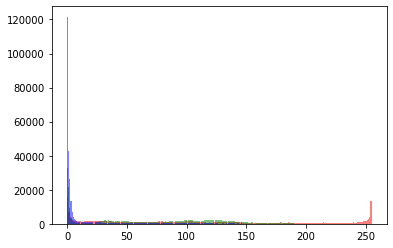

In [26]:
plt.figure()
plt.hist(img_red.ravel(), bins=256, color="r", alpha=0.5)
plt.hist(img_green.ravel(), bins=256, color="g", alpha=0.5)
plt.hist(img_blue.ravel(), bins=256, color="b", alpha=0.5)
plt.show()

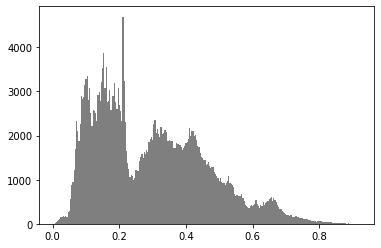

In [27]:
plt.figure()
plt.hist(img_gray.ravel(), bins=256, color="k", alpha=0.5)
plt.show()

## **Binarización y Umbralización**<a name="id4"></a>
- Binarizar es el arte de normalizar todos los píxeles de una imagen en términos de unos y ceros, de True y False.

![image](https://felixniklas.com/imageprocessing/content/01-binarization/binarization.png)

> Imagen tomada de [Felix Niklas](https://felixniklas.com/)

- Umbralizar es el arte de binarizar una imagen dado un umbral numérico.
### **Cómo recorrer una imagen**<a name="id4-1"></a>
- Apliquemos el concepto de umbralización a una imagen pixel por pixel

In [27]:
def binarize(img, threshold, gt=True):
    binarized_img = np.zeros_like(img, dtype=np.bool)
    
    for i in range(binarized_img.shape[0]):
        for j in range(binarized_img.shape[1]):
            mask= img[i, j] > threshold if gt else img[i, j] < threshold
            binarized_img[i, j] = mask

    return binarized_img

### **Binarizar a través de  `try_all_threshold` de scikit-image**<a name="id4-2"></a>

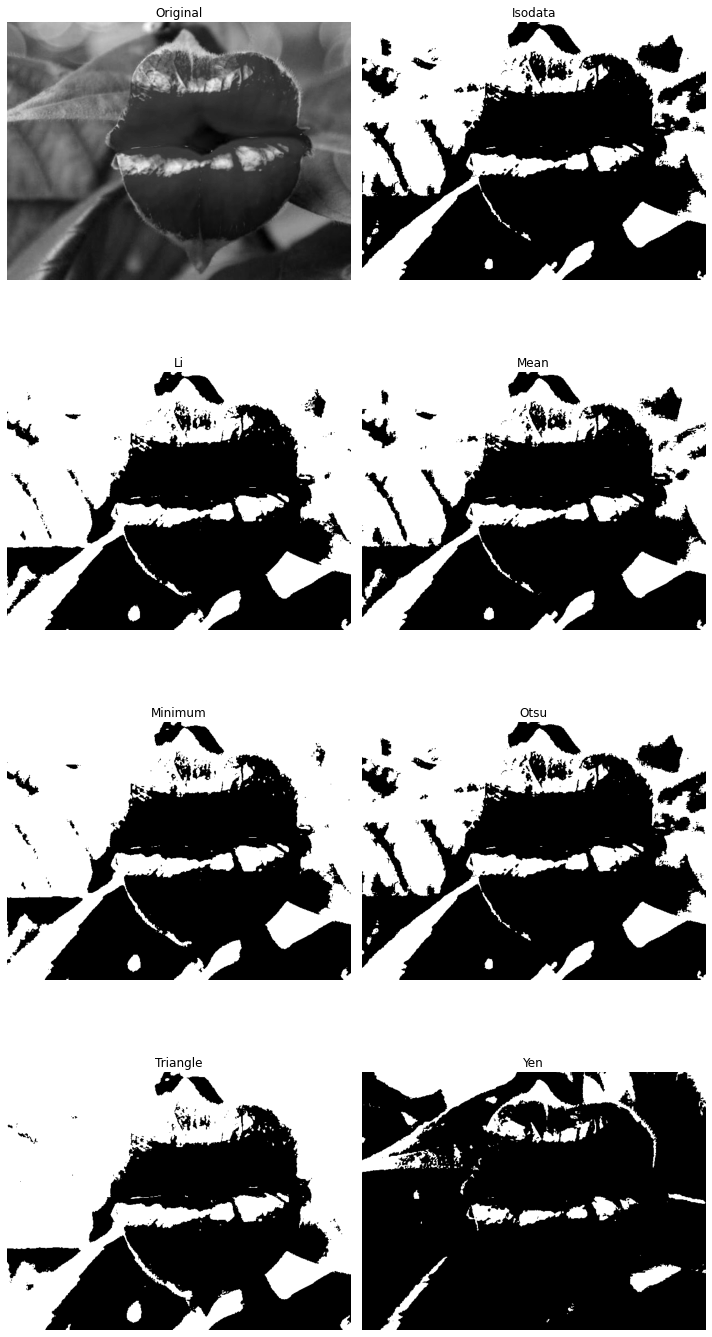

In [34]:
plot = try_all_threshold(img_gray, figsize=(10, 20), verbose=0)

### **Segmentación usando el método de la umbralización**<a name="id4-3"></a>
- Segmentar es dividir una imagen en distintas partes u grupos de píxeles.

In [35]:
threshold = threshold_otsu(img_gray)
binarized = binarize(img_gray, threshold, gt=False)

In [36]:
segmented_img = binarized * img_gray

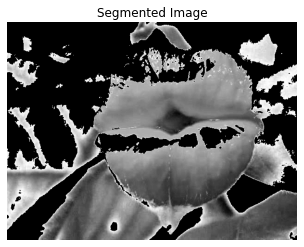

In [37]:
vis.visualize(segmented_img, title="Segmented Image")